# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](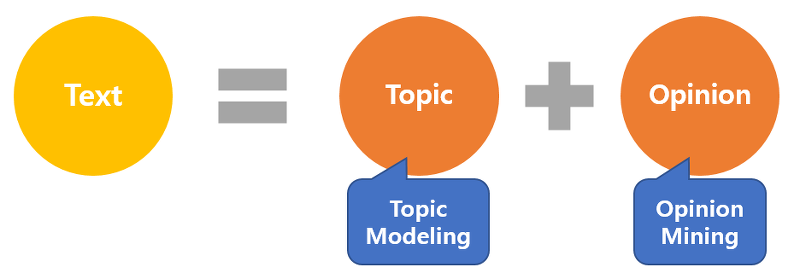)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


### 데이터 준비

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsdata=fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

1.   사용할 데이터를 구성 
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [2]:
from afinn import Afinn
afinn=Afinn()
for i in range(10):
    print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



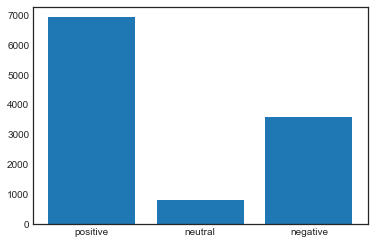

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive=0
neutral=0
negative=0

for i in newsdata.data:
    score=afinn.score(i)
    if score>0:
        positive+=1
    elif score==0:
        neutral+=1
    else:
        negative+=1
        
plt.bar(np.arange(3),[positive,neutral,negative])
plt.xticks(np.arange(3),['positive','neutral','negative'])
plt.show()

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [4]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [5]:
train_file=urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file=urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

In [6]:
a=urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
b=urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

In [7]:
train_file=a
test_file=b

In [8]:
train_data=pd.read_table(train_file)
test_data=pd.read_table(test_file)

In [9]:
train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [10]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

146182
2


In [11]:
train_data.drop_duplicates(subset=['document'],inplace=True)
print(train_data.isnull().sum())

train_data=train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [12]:
train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:10]

C:\Users\taehwan\AppData\Local\Temp\ipykernel_13032\118799076.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [13]:
train_data['document'].replace('',np.nan,inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id            0
document    391
label         0
dtype: int64


In [14]:
train_data=train_data.dropna(how='any')
print(len(train_data))

145791


In [15]:
test_data.drop_duplicates(subset=['document'],inplace=True)
test_data['document']=test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'].replace('',np.nan,inplace=True)
test_data=test_data.dropna(how='any')

C:\Users\taehwan\AppData\Local\Temp\ipykernel_13032\1384645350.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document']=test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [16]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [17]:
from eunjeon import Mecab
mecab=Mecab()

X_train=[]
for sentence in train_data['document']:
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [18]:
print(X_train[:3])

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었', '다', '그래서', '보', '것', '을', '추천', '한다']]


In [19]:
X_test=[]
for sentence in test_data['document']:
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [20]:
print(X_test[:3])

[['굳', 'ㅋ'], ['뭐', '야', '평점', '나쁘', '진', '않', '지만', '점', '짜리', '더더욱', '아니', '잖아'], ['지루', '하', '지', '않', '은데', '완전', '막장', '임', '돈', '주', '고', '보', '기']]


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index) #결과가 길어 렉

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [26]:
threshold=3
words_cnt=len(tokenizer.word_index)
rare_cnt=0
words_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
    words_freq=words_freq+value
    
    if value<threshold:
        rare_cnt +=1
        rare_freq =rare_freq + value
print("전체 단어 수:",words_cnt)
print("빈도가 {} 이하인 희귀 단어 수:{}".format(threshold-1,rare_cnt))
print("희귀 단어 비율: {}".format((rare_cnt/words_cnt)*100))
print("희귀 단어 등장 빈도 비율:{}".format((rare_freq/words_freq)*100))

전체 단어 수: 49590
빈도가 2 이하인 희귀 단어 수:28110
희귀 단어 비율: 56.684815486993344
희귀 단어 등장 빈도 비율:1.7454099037762576


In [34]:
vocab_size=words_cnt-rare_cnt+2
print(vocab_size)

21482


In [35]:
tokenizer=Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [37]:
y_train=np.array(train_data['label'])
y_test=np.array(test_data['label'])

In [39]:
drop_train=[index for index, sentence in enumerate(X_train) if len(sentence)<1]

X_train=np.delete(X_train,drop_train,axis=0)
y_train=np.delete(y_train,drop_train,axis=0)

print(len(X_train))
print(len(y_train))

145380
145380


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [40]:
print('리뷰 최대 길이:',max(len(l) for l in X_train))
print('리뷰 평균 길이:',sum(map(len,X_train))/len(X_train))

리뷰 최대 길이: 83
리뷰 평균 길이: 13.805839867932315


Text(0, 0.5, 'Number of Samples')

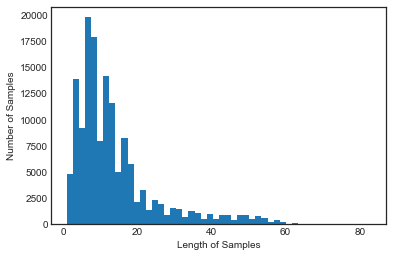

In [41]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')

In [42]:
max_len=60

In [116]:
X_train=pad_sequences(X_train,maxlen=max_len)
X_test=pad_sequences(X_test,maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [45]:
from tensorflow.keras.layers import Embedding,Dense,LSTM
from tensorflow.keras.models import Sequential

In [46]:
model=Sequential()
model.add(Embedding(vocab_size,100))
model.add(LSTM(128))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2148200   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,265,577
Trainable params: 2,265,577
Non-trainable params: 0
_________________________________________________________________


In [48]:
history=model.fit(X_train,y_train,epochs=15,batch_size=60,validation_split=0.2)

Epoch 1/15
1939/1939 [==============================] - 118s 61ms/step - loss: 0.2895 - acc: 0.8783 - val_loss: 0.3180 - val_acc: 0.8632
Epoch 2/15
1939/1939 [==============================] - 122s 63ms/step - loss: 0.2702 - acc: 0.8887 - val_loss: 0.3105 - val_acc: 0.8657
Epoch 3/15
1939/1939 [==============================] - 122s 63ms/step - loss: 0.2530 - acc: 0.8974 - val_loss: 0.3098 - val_acc: 0.8677
Epoch 4/15
1939/1939 [==============================] - 122s 63ms/step - loss: 0.2383 - acc: 0.9042 - val_loss: 0.3290 - val_acc: 0.8604
Epoch 5/15
1939/1939 [==============================] - 123s 64ms/step - loss: 0.2231 - acc: 0.9124 - val_loss: 0.3266 - val_acc: 0.8628
Epoch 6/15
1939/1939 [==============================] - 122s 63ms/step - loss: 0.2089 - acc: 0.9182 - val_loss: 0.3342 - val_acc: 0.8587
Epoch 7/15
1939/1939 [==============================] - 114s 59ms/step - loss: 0.1945 - acc: 0.9245 - val_loss: 0.3469 - val_acc: 0.8593
Epoch 8/15
1939/1939 [===================

In [49]:
model.evaluate(X_test,y_test)

1532/1532 [==============================] - 20s 13ms/step - loss: 0.5786 - acc: 0.8400


[0.5785828232765198, 0.8400040864944458]

#### 시각화

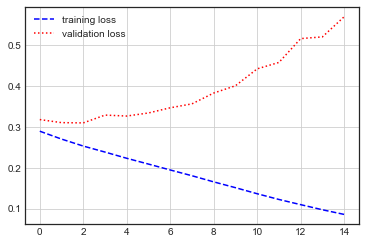

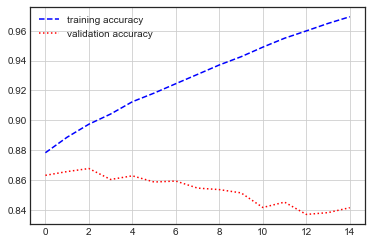

In [52]:
hist_dict=history.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

plt.plot(loss,'b--',label='training loss')
plt.plot(val_loss,'r:',label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc,'b--',label='training accuracy')
plt.plot(val_acc,'r:',label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [53]:
def sentiment_predict(new_sentence):
    new_token=[word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences=tokenizer.texts_to_sequences([new_token])
    new_pad=pad_sequences(new_sequences,maxlen=max_len)
    score=float(model.predict(new_pad))
    
    if score>0.5:
        print("{}->긍정({:.2f}%)".format(new_sentence,score*100))
    else:
        print("{}->부정({:.2f}%)".format(new_sentence,(1-score)*100))

In [54]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('배우 연기력이 대박입니다.')
sentiment_predict('분위기가 어둡고 스토리가 복잡해요.')

정말 재미있고 흥미진진 했어요.->긍정(99.68%)
어떻게 이렇게 지루하고 재미없죠?->부정(99.94%)
배우 연기력이 대박입니다.->긍정(94.86%)
분위기가 어둡고 스토리가 복잡해요.->긍정(57.31%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

In [60]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="shopping.txt")

('shopping.txt', <http.client.HTTPMessage at 0x2234d414400>)

In [61]:
total_data=pd.read_table('shopping.txt',names=['ratings','reviews'])
print(len(total_data))

200000


In [62]:
total_data[:10]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


#### 훈련 데이터와 테스트 데이터 분리

In [63]:
total_data['label']=np.select([total_data.ratings>3],[1],default=0)
total_data[:10]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,0
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,0
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~,0
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...,0


In [64]:
total_data['ratings'].nunique(),total_data['reviews'].nunique(),total_data['label'].nunique()

(4, 199908, 2)

In [65]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)
print(len(total_data))

199908


In [67]:
from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(total_data,test_size=0.25,random_state=111)
print(len(train_data))
print(len(test_data))

149931
49977


#### 레이블의 분포 확인

<AxesSubplot:>

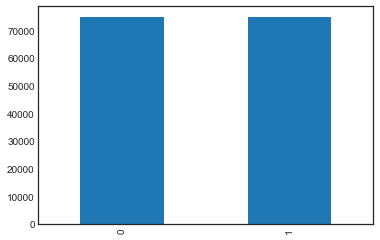

In [68]:
train_data['label'].value_counts().plot(kind='bar')

In [69]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74974
1,1,74957


#### 데이터 정제

In [70]:
train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('',np.nan,inplace=True)
print(len(train_data))

149931


C:\Users\taehwan\AppData\Local\Temp\ipykernel_13032\1400919509.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [86]:
train_data[100:110]

,ratings,reviews,label
4055,2,"[변기, 끼우, 나사, 매우, 큽니다, 저희, 최근, 아파트, 사, 는데, 안, 맞...",0
184233,5,"[색상, 진짜, 이뻐요]",1
72995,5,"[사용, 기, 편하, 만듦새, 좋, 아요]",1
29247,5,"[목걸이, 생각, 보다, 이뻐서, 좋, 았, 습니다, ㅎ]",1
159261,4,"[촉촉, 네요, 바르, 느낌, ㅜ]",1
169964,2,"[배송, 메세지, 빼먹, 으셔서, 경비실, 두, 심, 무거웠, 음]",0
136467,5,"[편식, 딸아이, 위해, 구입, 다만, 백김치, 물김치, 차이, 뭔지, 잘, 모르,...",1
148334,1,"[일, 정도, 기다렸, 받, 았, 는데, 거기, 하나, 불량, 소리, 크]",0
178019,4,"[소재, 랑, 사이즈, 딱, 조아, 오]",1
156517,5,"[상품, 상태, 좋, 네요, 작동, 잘, 됩니다, 좋, 상품, 보내, 주, 셔서, ...",1


In [71]:
test_data.drop_duplicates(subset=['reviews'],inplace=True)
test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['reviews'].replace('',np.nan,inplace=True)
print(len(test_data))

49977


C:\Users\taehwan\AppData\Local\Temp\ipykernel_13032\3442631330.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [88]:
test_data[:30]

,ratings,reviews,label
125929,2,"[배송, 빠르, 네요, 제품, 여러, 번, 쓰, 기, 어려워, 보이, 네요]",0
26487,4,"[워, 셔, 액, 인터넷, 첫, 구매, 인데, 만족, 합니다, 가격, 저렴]",1
138544,5,"[지정, 배송, 당일, 날, 오, 배송, 기사, 님, 좋, 았, 습니다, 상품, 튼...",1
90778,5,"[조아, 요, ㄷ, ㅅ, ㄷ, ㅅ, ㅅ, ㄱ, ㄷ, ㅅ, ㄷ, ㅅ, ㄴ, ㅅ, ㄷ,...",1
190911,5,"[짱, 예요, 이렇게, 많, 줄, 몰, 랏, 어, 욤]",1
67710,2,"[위아래, 폭, 달라서, 사이즈, 애매, 네요]",0
44246,1,"[냄새, 너무, 심해서, 머리, 아파요, ㅜㅜ, 몇일, 뒀, 는데, 냄새, 안, 빠...",0
77418,1,"[피부, 가려워, 요, ㅜㅜ]",0
137737,5,"[무게, 좀, 나가, 는데, 대신, 튼튼, 크기, 딱, 적당, 해서, 너무, 만족,...",1
62258,2,"[완전, 불편, 해요]",0


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [72]:
stopwords=['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

train_data['reviews']=train_data['reviews'].apply(mecab.morphs)
train_data['reviews']=train_data['reviews'].apply(lambda x:[item for item in x if item not in stopwords])

In [73]:
test_data['reviews']=test_data['reviews'].apply(mecab.morphs)
test_data['reviews']=test_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

In [117]:
X_train=train_data['reviews'].values
y_train=train_data['label'].values
X_test=test_data['reviews'].values
y_test=test_data['label'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149931,)
(149931,)
(49977,)
(49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [118]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [119]:
threshold=3
words_cnt=len(tokenizer.word_index)
rare_cnt=0
words_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
    words_freq=words_freq+value
    
    if value<threshold:
        rare_cnt +=1
        rare_freq =rare_freq + value
print("전체 단어 수:",words_cnt)
print("빈도가 {} 이하인 희귀 단어 수:{}".format(threshold-1,rare_cnt))
print("희귀 단어 비율: {}".format((rare_cnt/words_cnt)*100))
print("희귀 단어 등장 빈도 비율:{}".format((rare_freq/words_freq)*100))

전체 단어 수: 39733
빈도가 2 이하인 희귀 단어 수:22902
희귀 단어 비율: 57.63974529987668
희귀 단어 등장 빈도 비율:1.2105580649176668


In [120]:
vocab_size=words_cnt-rare_cnt+2
print(vocab_size)

16833


In [121]:
tokenizer=Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(X_train)

In [122]:
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

#### 패딩

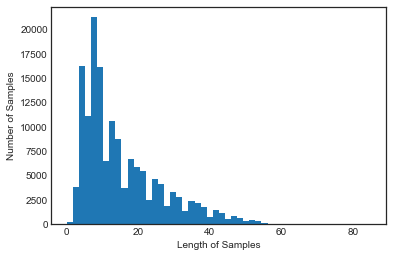

In [123]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [124]:
max_len=60

In [125]:
X_train=pad_sequences(X_train,maxlen=max_len)
X_test=pad_sequences(X_test,maxlen=max_len)

#### 모델 구축 및 학습

In [126]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Embedding,Dense,GRU
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [127]:
model=Sequential()
model.add(Embedding(vocab_size,100))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

In [128]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
mc=ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)

In [129]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(X_train,y_train,epochs=15,callbacks=[es,mc],batch_size=60,validation_split=0.2)

Epoch 1/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2687 - acc: 0.8991
Epoch 1: val_acc improved from -inf to 0.91310, saving model to best_model.h5
2000/2000 [==============================] - 86s 43ms/step - loss: 0.2687 - acc: 0.8991 - val_loss: 0.2375 - val_acc: 0.9131
Epoch 2/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2125 - acc: 0.9231
Epoch 2: val_acc improved from 0.91310 to 0.92210, saving model to best_model.h5
2000/2000 [==============================] - 92s 46ms/step - loss: 0.2125 - acc: 0.9231 - val_loss: 0.2199 - val_acc: 0.9221
Epoch 3/15
2000/2000 [==============================] - ETA: 0s - loss: 0.1965 - acc: 0.9294
Epoch 3: val_acc improved from 0.92210 to 0.92290, saving model to best_model.h5
2000/2000 [==============================] - 86s 43ms/step - loss: 0.1965 - acc: 0.9294 - val_loss: 0.2124 - val_acc: 0.9229
Epoch 4/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.1868 - acc: 0.9336
Epoch 4: val_

In [130]:
loaded_model=load_model('best_model.h5')
loaded_model.evaluate(X_test,y_test)

1562/1562 [==============================] - 12s 8ms/step - loss: 0.2102 - acc: 0.9261


[0.2101890742778778, 0.9260860085487366]

#### 시각화

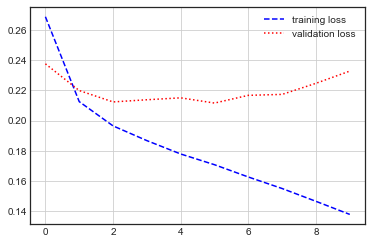

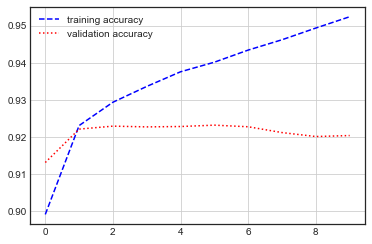

In [131]:
hist_dict=history.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

plt.plot(loss,'b--',label='training loss')
plt.plot(val_loss,'r:',label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc,'b--',label='training accuracy')
plt.plot(val_acc,'r:',label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [132]:
def sentiment_predict(new_sentence):
    new_token=[word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences=tokenizer.texts_to_sequences([new_token])
    new_pad=pad_sequences(new_sequences,maxlen=max_len)
    score=float(loaded_model.predict(new_pad))
    
    if score>0.5:
        print("{}->긍정({:.2f}%)".format(new_sentence,score*100))
    else:
        print("{}->부정({:.2f}%)".format(new_sentence,(1-score)*100))

In [133]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은거 인정! 추가 구매 의향 있습니다.')
sentiment_predict('이건 정말 리뷰 쓰는게 아깝네요.')

처음 써봤는데 대박 좋아요.->긍정(97.19%)
원래 배송이 이렇게 늦나요?->부정(97.80%)
좋은거 인정! 추가 구매 의향 있습니다.->긍정(91.24%)
이건 정말 리뷰 쓰는게 아깝네요.->부정(95.47%)
